In [1]:
%load_ext autoreload
%load_ext watermark

In [2]:
%autoreload 2

In [3]:
%watermark -ntz -p pandas,matplotlib,mplleaflet,convertbng

Sat Jul 30 2022 16:03:23 India Standard Time 

pandas 1.0.4
matplotlib 3.2.1
mplleaflet 0.0.5
convertbng 0.6.17


In [4]:
from pathlib import Path

import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
from convertbng.util import convert_bng, convert_lonlat

---
# Exercise 2: Visualise traffic counting station locations
Traffic data was collected at a number of sites across Cumbria.
Before we can compare and constrast the analysis of different sites,
we must first understand how they relate
to one-another.
At the end of this exercise,
you should have an understanding
of how the counting stations are distributed
across Cumbria
and have begun
to formulate ideas
about differences you may find
in recorded traffic counts.

## Learning objectives
Objectives which _may_ be met during this exercise.

_Refer to the [exercise document](../references/exercise_background.md#development-objectives) for more information on objectives_

- I can load data as common tabular data formats
- I can plot geospatial data (_DATA 2_)

---
## Step 1: Load and investigate the station data
You have been provided an excel file containing information
on the traffic data collection stations.

**Tasks:**
- Load the excel data as a pandas dataframe
- Investigate the data:
    - How many stations are there?
    - Are all "Site No" codes unique?
    - Are there any missing data points?

In [28]:
data_path = Path.cwd().resolve().parent / "analysis" / "data"
counters_path = data_path / "raw" / "cumbria_counters.xlsx"
traffic_data_path = data_path / "interim" / "counter_data.csv"

In [48]:
df_counter = pd.read_csv(traffic_data_path)

In [49]:
df_counter

,Date,Hour Ending,Special day,Counter ID,Counts
0,2019-01-01 01:00:00,1,bo,20011,12
1,2019-01-01 02:00:00,2,bo,20011,10
2,2019-01-01 03:00:00,3,bo,20011,2
3,2019-01-01 04:00:00,4,bo,20011,8
4,2019-01-01 05:00:00,5,bo,20011,2
...,...,...,...,...,...
186619,2019-12-31 20:00:00,20,o,60006,6
186620,2019-12-31 21:00:00,21,o,60006,6
186621,2019-12-31 22:00:00,22,o,60006,2
186622,2019-12-31 23:00:00,23,o,60006,0


In [29]:
df = pd.read_excel(counters_path)

In [30]:
df.head()

,Site No,Description,Road,Easting,Northing,Zone
0,20007,"Borrowdale Road, Keswick",B5289,326754,522910,32
1,20009,Low Lorton,B5289,315361,525676,32
2,20011,St Johns in the Vale,B5322,331594,523093,32
3,20025,"Deanscales, S of Cockermouth",A5086,309617,526018,32
4,20027,"W of Wigton (Wheyrigg Farm), between Waverbrid...",B5302,319487,548807,32


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Site No      52 non-null     int64 
 1   Description  52 non-null     object
 2   Road         52 non-null     object
 3   Easting      52 non-null     int64 
 4   Northing     52 non-null     int64 
 5   Zone         52 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.6+ KB


In [34]:
df['Site No'].nunique()

52

In the Data provided to us there are 24 unique stations, here we have the data of 52 unique ones.

---
## Step 2: Convert to longitude and latitude
You will notice that the data contains parameters
"Easting" and "Northing".
To plot the sites on a map,
however,
we need to know the latitude and longitude.

**Tasks:**
- Use [`convertbng`](https://pypi.org/project/convertbng/) or another package to get the lat, long coordinates of the sites
- **[Extension]** Add the lat, lon coordinates as columns in the dataframe and drop "Easting" and "Northing" _or_ use the `apply` method to do the conversion directly

In [35]:
df['Easting'][0]

326754

In [44]:
convert_lonlat(df['Easting'],df['Northing'])

([-3.13517992,
  -3.31226639,
  -3.06032588,
  -3.40129471,
  -3.25479088,
  -3.53910061,
  -3.5292579,
  -3.09568706,
  -2.58025987,
  -2.84872226,
  -2.82482213,
  -2.97066928,
  -2.32211992,
  -2.75920813,
  -2.74633361,
  -2.76220289,
  -2.94055935,
  -2.72703528,
  -3.261745,
  -3.58403504,
  -3.57949838,
  -3.4314981,
  -3.29352141,
  -3.5846283,
  -2.75057353,
  -2.77738752,
  -2.97499157,
  -2.95132402,
  -2.63496979,
  -2.72920171,
  -2.66696399,
  -2.66802676,
  -2.5719972,
  -2.71076091,
  -2.76609198,
  -2.76659705,
  -2.77611971,
  -2.73945667,
  -2.74431121,
  -2.75114145,
  -2.73910163,
  -2.73626742,
  -2.73410524,
  -2.812825,
  -3.1623164,
  -2.72546169,
  -2.81750769,
  -2.51706848,
  -2.94395903,
  -3.08712539,
  -3.16697355,
  -3.18746468],
 [54.59604766,
  54.61911671,
  54.59837104,
  54.62119201,
  54.82760958,
  54.60908419,
  54.62201636,
  54.58710072,
  54.4404086,
  54.60307782,
  54.80033441,
  54.75347607,
  54.5027273,
  54.65917603,
  54.6587169,
  54.6

In [42]:
df['longitude'] = convert_lonlat(df['Easting'],df['Northing'])[0]
df['latitude'] = convert_lonlat(df['Easting'],df['Northing'])[1]

In [43]:
df.head()

,Site No,Description,Road,Easting,Northing,Zone,longitude,latitude
0,20007,"Borrowdale Road, Keswick",B5289,326754,522910,32,-3.135180,54.596048
1,20009,Low Lorton,B5289,315361,525676,32,-3.312266,54.619117
2,20011,St Johns in the Vale,B5322,331594,523093,32,-3.060326,54.598371
3,20025,"Deanscales, S of Cockermouth",A5086,309617,526018,32,-3.401295,54.621192
4,20027,"W of Wigton (Wheyrigg Farm), between Waverbrid...",B5302,319487,548807,32,-3.254791,54.827610


In [56]:
plt.plot(df['longitude'], df['latitude'], 'rs') # Draw red squares
mplleaflet.display()

C:\Users\ANIRUPAD\Anaconda3\envs\traffic-exercise-dev-test\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Here I have displayed all the 52 sites given in the counter data.

In [50]:
df_counter['Counter ID'].unique()

array([20011, 20012, 20053, 20054, 30021, 30022, 30023, 30024, 50003,
       50004, 50009, 50010, 50011, 50012, 50043, 50044, 50053, 50054,
       50077, 50078, 60003, 60004, 60005, 60006], dtype=int64)

In [51]:
df['Site No'].unique()

array([20007, 20009, 20011, 20025, 20027, 20041, 20047, 20053, 30001,
       30003, 30005, 30007, 30009, 30011, 30013, 30015, 30021, 30023,
       40003, 40005, 40007, 40009, 40011, 40015, 50001, 50003, 50009,
       50011, 50013, 50015, 50017, 50019, 50021, 50025, 50027, 50028,
       50029, 50031, 50033, 50035, 50037, 50039, 50041, 50043, 50045,
       50051, 50053, 50075, 50077, 60003, 60005, 60007], dtype=int64)

In [54]:
df_counter[df_counter['Counter ID'].isin(df['Site No'].unique())]['Counter ID'].unique()

array([20011, 20053, 30021, 30023, 50003, 50009, 50011, 50043, 50053,
       50077, 60003, 60005], dtype=int64)

here we can see clearly that only 12 sites out of 24 sites in the traffic data can be traced on the map.

---
## Step 3: Plot the sites on a map

**Tasks:**
- Read the [`mplleaflet`](https://github.com/jwass/mplleaflet) documentation to learn how to plot a map
- Using `matplotlib` and `mplleaflet`,
plot the sites on a map
- Using the interim `counter_data.csv` file of collected traffic counts,
only plot counting stations for which some data has been collected

In [81]:
df_available = df[df['Site No'].isin(df_counter[df_counter['Counter ID'].isin(df['Site No'].unique())]['Counter ID'].unique())]
df_available.reset_index(inplace = True)
df_available.drop(['index'], axis = 1, inplace = True)

In [100]:
plt.plot(df_available['longitude'], df_available['latitude'], 'rs') # Draw red squares
mplleaflet.display()

C:\Users\ANIRUPAD\Anaconda3\envs\traffic-exercise-dev-test\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


---
## Step 4: Compare sites
While informative,
it can be difficult to spot all the sites
on the map.

**Tasks:**
- Plot the sites on a blank background (i.e. not overlayed on a map)
- Add site numbers as labels to the plot markers
- Make notes on the distribution of these sites
    - Which sites are nearby?
    - Which sites are in towns?
    - What might you expect to see from the data based on this location information?

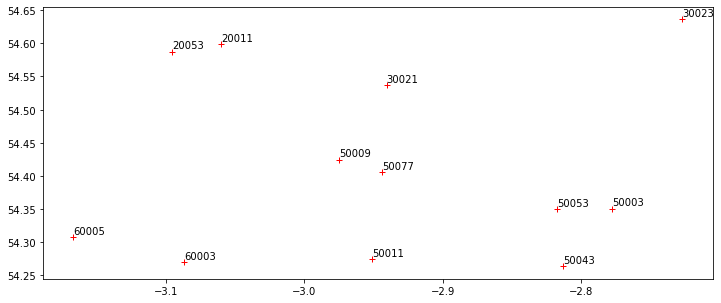

In [104]:
plt.figure(figsize = (12,5))
plt.plot(df_available['longitude'], df_available['latitude'], 'r+') # Draw red crosses
for i in range(len(df_available['longitude'])):
    plt.annotate(df_available['Site No'][i], ((df_available['longitude'][i], (df_available['latitude'][i] + 0.0052))))

In [82]:
df_available

,Site No,Description,Road,Easting,Northing,Zone,longitude,latitude
0,20011,St Johns in the Vale,B5322,331594,523093,32,-3.060326,54.598371
1,20053,"S of Nest Brow, Keswick",A591,329290,521874,32,-3.095687,54.587101
2,30021,Patterdale,A592,339240,516145,32,-2.940559,54.536918
3,30023,Clifton,A6,353170,527026,32,-2.727035,54.636178
4,50003,"Ratherheath, NW of Kendal",A591,349568,495224,32,-2.777388,54.350057
5,50009,"Clappersgate, W of Ambleside",A593,336838,503605,32,-2.974992,54.423944
6,50011,N of Newby Bridge,A592,338148,486884,32,-2.951324,54.273854
7,50043,Sampool Bridge,A5074,347153,485575,32,-2.812825,54.263103
8,50053,E of Crook,B5284,346960,495232,32,-2.817508,54.349863
9,50077,"Briery Wood, Windermere",A591,338824,501533,32,-2.943959,54.405569


In [79]:
df_available['Site No']

0     20011
1     20053
2     30021
3     30023
4     50003
5     50009
6     50011
7     50043
8     50053
9     50077
10    60003
11    60005
Name: Site No, dtype: int64

---
## Step 5: Consider useful data
You will notice that not all of the counting stations on the map have counting data,
and not all of the stations with counting data have coordinates.

Take some time to think about how you could deal with this missing data.
For example,
should you only include stations with counting data and coordinates,
for simplicity?
Alternatively,
you could keep all stations with counting data,
but that will limit your ability to make inferences using location.

**Tasks:**
- Think about ways to deal with missing data
    - Are you left with enough data if you remove missing locations?
    - Do you think location will play a large part of your analysis in the future?

---
## **[Extension]** Step 6: Save the augmented dataframe
In previous steps, we have converted Easting/Northing into lat/lon coordinates.
If we need to use the coordinates again,
it would be useful to save the current dataframe
so we do not have to re-run the conversion.

**Tasks:**
- Combine the coordinates dataset with the counting station data
- Save the dataframe to `data/interim/`

In [102]:
df_final = df_counter.merge(df_available, left_on = 'Counter ID', right_on = 'Site No', how = 'left')
df_final.to_csv(Path.cwd().resolve().parent /'analysis'/ "data" / "interim" / 'counter_data_with_coordinates.csv', index = False)

In [103]:
df_final[~df_final['Site No'].isna()]

,Date,Hour Ending,Special day,Counter ID,Counts,Site No,Description,Road,Easting,Northing,Zone,longitude,latitude
0,2019-01-01 01:00:00,1,bo,20011,12,20011.0,St Johns in the Vale,B5322,331594.0,523093.0,32.0,-3.060326,54.598371
1,2019-01-01 02:00:00,2,bo,20011,10,20011.0,St Johns in the Vale,B5322,331594.0,523093.0,32.0,-3.060326,54.598371
2,2019-01-01 03:00:00,3,bo,20011,2,20011.0,St Johns in the Vale,B5322,331594.0,523093.0,32.0,-3.060326,54.598371
3,2019-01-01 04:00:00,4,bo,20011,8,20011.0,St Johns in the Vale,B5322,331594.0,523093.0,32.0,-3.060326,54.598371
4,2019-01-01 05:00:00,5,bo,20011,2,20011.0,St Johns in the Vale,B5322,331594.0,523093.0,32.0,-3.060326,54.598371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178795,2019-12-31 20:00:00,20,o,60005,16,60005.0,Broughton to Torver,A593,324167.0,490803.0,32.0,-3.166974,54.307182
178796,2019-12-31 21:00:00,21,o,60005,8,60005.0,Broughton to Torver,A593,324167.0,490803.0,32.0,-3.166974,54.307182
178797,2019-12-31 22:00:00,22,o,60005,4,60005.0,Broughton to Torver,A593,324167.0,490803.0,32.0,-3.166974,54.307182
178798,2019-12-31 23:00:00,23,o,60005,4,60005.0,Broughton to Torver,A593,324167.0,490803.0,32.0,-3.166974,54.307182


In [107]:
df_final['Special day'].unique()

array(['bo', 'o', nan, 'b', 's'], dtype=object)

---
# Review
After this exercise:
- [ ] I can load data as common tabular data formats
- [ ] I can plot geospatial data (_DATA 2_)